# Mandelbrot Image - Performance

See https://www.ibm.com/developerworks/community/blogs/jfp/entry/How_To_Compute_Mandelbrodt_Set_Quickly?lang=en

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
def mandelbrot( h,w, maxit=20 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)
    
    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2         # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much

    return divtime

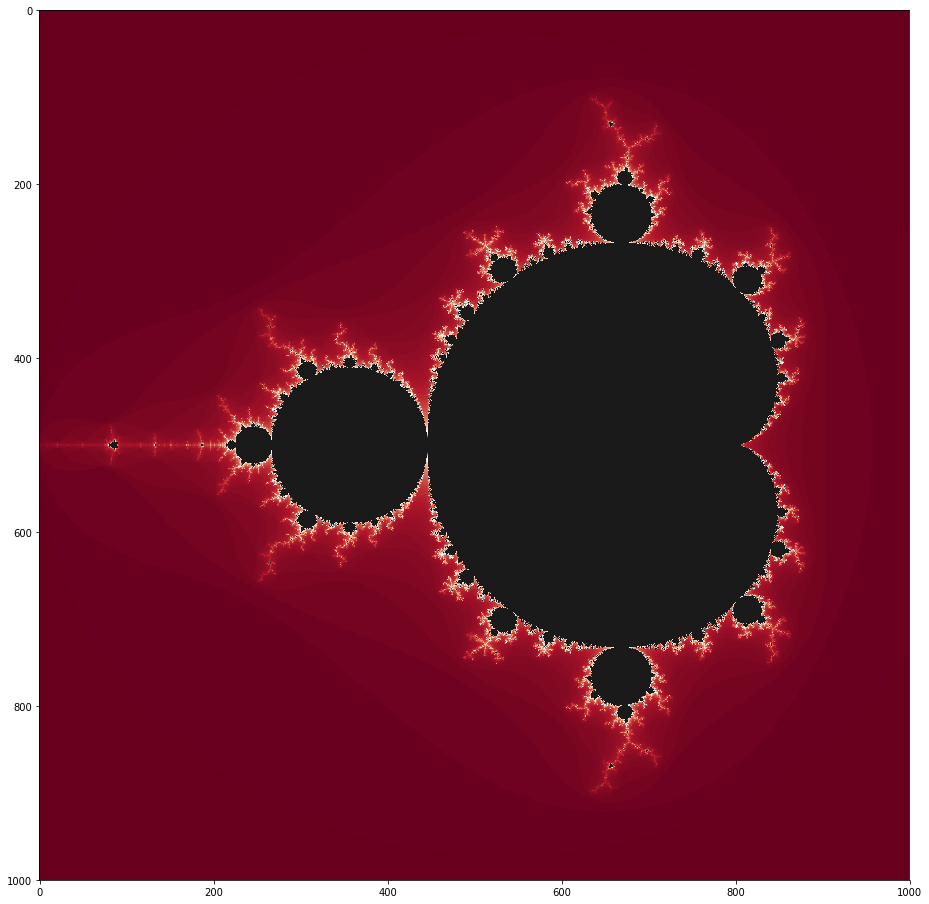

In [40]:
plt.figure(figsize=(16, 16))
plt.imshow(mandelbrot(1000,1000, maxit=140), cmap=cm.RdGy)
plt.show()